# Distributing standardized COMBINE archives with Tellurium

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-and-libroadrunner.png" width="60%" style="padding: 20px"></div>
<div align='center' style='font-size:100%'>
Veronica L. Porubsky, BS
<div align='center' style='font-size:100%'>Sauro Lab PhD Student, Department of Bioengineering<br>
Head of Outreach, <a href="https://reproduciblebiomodels.org/dissemination-and-training/seminar/">Center for Reproducible Biomedical Modeling</a><br>
University of Washington, Seattle, WA USA
</div>
<hr>

To facilitate design and comprehension of their models, modelers should use standard systems biology formats for
model descriptions, simulation experiments, and to distribute stand-alone archives which can regenerate the modeling study. We will discuss three of these standards - the Systems Biology Markup Language (SBML), the Simulation Experiment Description Markup Language (SED-ML), and the COMBINE archive/ inline Open Modeling EXchange format (OMEX) format.


## TOC
* [Links to relevant resources](#relevant-resources)
* [Packages and Constants](#standardized-formats-packages-and-constants)
* [Import and export capabilities with Tellurium](#import-export)
* [Importing SBML directly from the BioModels Database for simulation](#import-from-biomodels)
* [Exporting SBML or Antimony models](#export-to-sbml-or-antimony)
* [Writing SED-ML with PhraSED-ML](#writing-phrasedml)
* [Exporting SED-ML](#exporting-sedml)
* [Generating a COMBINE archive](#combine-archive)
* [Exercises](#exercises)

# Links to relevant resources <a class="anchor" id="relevant-resources"></a>

<a href="http://model.caltech.edu/">SBML specification</a><br>
<a href="http://sbml.org/SBML_Software_Guide/SBML_Software_Matrix">SBML tool support</a><br>
<a href="https://sed-ml.org/">SED-ML specification</a><br>
<a href="https://sed-ml.org/showcase.html">SED-ML tool support</a><br>
<a href="http://phrasedml.sourceforge.net/phrasedml__api_8h.html">PhraSED-ML documentation</a><br>
<a href="http://phrasedml.sourceforge.net/Tutorial.html">PhraSED-ML tutorial</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/">Tellurium documentation</a><br>
<a href="https://libroadrunner.readthedocs.io/en/latest/">libRoadRunner documentation</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/antimony.html">Antimony documentation</a><br>
<a href="http://copasi.org/Download/">COPASI download</a><br>




# Packages and constants <a class="anchor" id="standardized-formats-packages-and-constants"></a>


In [27]:
!pip install tellurium -q

In [28]:
import tellurium as te
import phrasedml

# Import and export capabilities with Tellurium <a class="anchor" id="import-export"></a>

Models can be imported from the BioModels Database, given the appropriate BioModel ID using a standard URL format to programmatically access the model of interest. 

We will use this model of respiratory oscillations in Saccharomyces cerevisae by <a href="https://www.ebi.ac.uk/biomodels/BIOMD0000000090">Jana Wolf et al. (2001)</a> </div> as an example:
<br>

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_publication.PNG" width="65%" style="padding: 20px"></div>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_network.PNG" width="65%" style="padding: 20px"></div>

# Importing SBML directly from the BioModels Database for simulation <a class="anchor" id="import-from-biomodels"></a>

SBML is a software data format for describing computational biological models. Markup languages allow you to separate annotations and documentation about the content from the content itself, using standardized tags. So the model and annotations are stored in a single file, but tools that support SBML are designed to interpret these to perform tasks. SBML is independent of any particular software tool and is broadly applicable to the modeling domain. It is open and free, and widely supported. Tools might allow for writing the model, simulating the model, visualizing the network, etc.

We will demonstrate how Tellurium supports import and export of SBML model files.

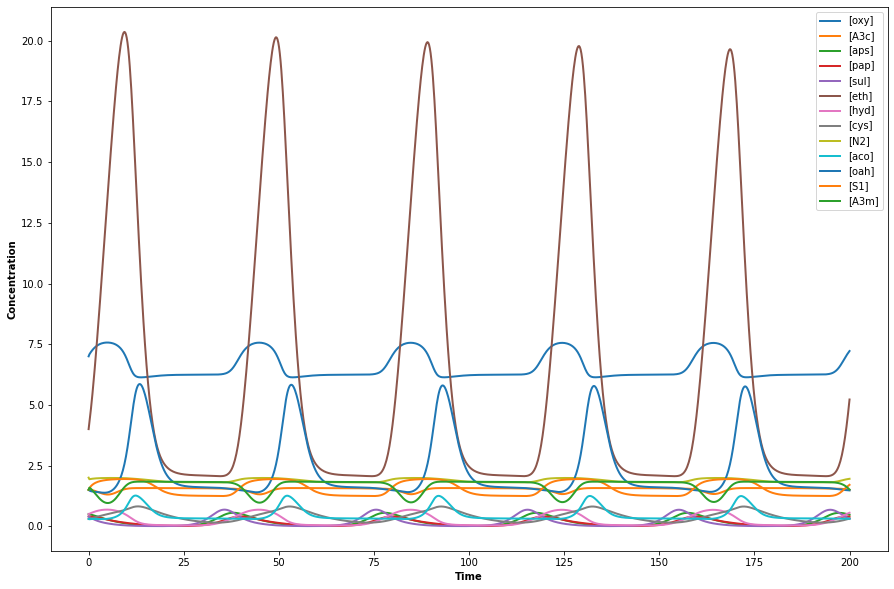

In [29]:
# Import an SBML model from the BioModels Database using a url
wolf = te.loadSBMLModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000090.2?filename=BIOMD0000000090_url.xml")
wolf.simulate(0, 200, 1000)
wolf.plot(figsize = (15, 10), xtitle = 'Time', ytitle = 'Concentration')

# Exporting SBML or Antimony models <a class="anchor" id="export-to-sbml-or-antimony"></a>

In [30]:
# Export the model you just accessed from BioModels to the current directory as an SBML string
wolf.reset()
wolf.exportToSBML('Wolf2001_Respiratory_Oscillations.xml', current = True)

In [18]:
# You can also export the model to the current directory as an Antimony string
# Let's take a look at the string first
print(wolf.getCurrentAntimony())

// Created by libAntimony v2.12.0
model *Wolf2001_Respiratory_Oscillations()

  // Compartments and Species:
  compartment c0, c1, c2;
  species $sul_ex in c0, $eth_ex in c0, $oxy_ex in c0, oxy in c2, $H2O in c2;
  species A3c in c1, aps in c1, $PPi in c1, pap in c1, sul in c1, eth in c1;
  species $A2c in c1, hyd in c1, cys in c1, N2 in c1, $N1 in c1, aco in c1;
  species oah in c1, S1 in c2, $S2 in c2, $C1 in c2, $C2 in c2, $A2m in c2;
  species A3m in c2, $Ho in c1, $Hm in c2;

  // Assignment Rules:
  A2c := Ac - A3c;
  N1 := N - N2;
  S2 := S - S1;
  A2m := Am - A3m;

  // Reactions:
  v1: $sul_ex => sul; c0*k_v0/(1 + (cys/Kc)^n);
  v13: $eth_ex => eth; c0*k_v13;
  v2: sul + A3c => aps + $PPi; c1*k2*sul*A3c;
  v10: $oxy_ex => oxy; c0*k_v10;
  v14: oxy => $oxy_ex; c2*k14*oxy;
  v3: aps + A3c => pap + $A2c; c1*k3*aps*A3c;
  v4: pap + 3 N2 => hyd + 3 $N1; c1*k4*pap*N2;
  v5: hyd + oah => cys; c1*k5*hyd*oah;
  v6: cys => ; c1*k6*cys;
  v7: eth + 2 $N1 => aco + 2 N2; c1*k7*eth*N1;
  v1

In [19]:
# Edit the Antimony string of Wolf et al.:
# Update model name for ease of use with PhraSED-ML
# Remove model name annotatations -- causes error with SED-ML export
wolf = te.loada("""
// Created by libAntimony v2.12.0
model wolf

  // Compartments and Species:
  compartment c0, c1, c2;
  species $sul_ex in c0, $eth_ex in c0, $oxy_ex in c0, oxy in c2, $H2O in c2;
  species A3c in c1, aps in c1, $PPi in c1, pap in c1, sul in c1, eth in c1;
  species $A2c in c1, hyd in c1, cys in c1, N2 in c1, $N1 in c1, aco in c1;
  species oah in c1, S1 in c2, $S2 in c2, $C1 in c2, $C2 in c2, $A2m in c2;
  species A3m in c2, $Ho in c1, $Hm in c2;

  // Assignment Rules:
  A2c := Ac - A3c;
  N1 := N - N2;
  S2 := S - S1;
  A2m := Am - A3m;

  // Reactions:
  v1: $sul_ex => sul; c0*k_v0/(1 + (cys/Kc)^n);
  v13: $eth_ex => eth; c0*k_v13;
  v2: sul + A3c => aps + $PPi; c1*k2*sul*A3c;
  v10: $oxy_ex => oxy; c0*k_v10;
  v14: oxy => $oxy_ex; c2*k14*oxy;
  v3: aps + A3c => pap + $A2c; c1*k3*aps*A3c;
  v4: pap + 3 N2 => hyd + 3 $N1; c1*k4*pap*N2;
  v5: hyd + oah => cys; c1*k5*hyd*oah;
  v6: cys => ; c1*k6*cys;
  v7: eth + 2 $N1 => aco + 2 N2; c1*k7*eth*N1;
  v15: aco => oah; c1*k15*aco;
  v17: hyd => ; c1*k17*hyd;
  v18: oah => ; c1*k18*oah;
  v8: $S2 + aco => S1; c2*k8*aco*S2;
  v9: S1 + 4 $N1 => $S2 + 4 N2; c2*k9*S1*N1;
  v11a: $C1 + $Hm + N2 => $C2 + $Ho + $N1; c2*k11*N2*oxy/((a*N2 + oxy)*(1 + (hyd/Kh)^m));
  v11a2: $C2 + oxy => $C1 + $H2O; c2*k11*N2*oxy/((a*N2 + oxy)*(1 + (hyd/Kh)^m));
  v16: $A2c + A3m => $A2m + A3c; c2*k16*A3m*A2c;
  v11b: $Ho + $A2m => $Hm + A3m; (c2*3*k11*N2*oxy/((a*N2 + oxy)*(1 + (hyd/Kh)^m)))*A2m/(Ka + A2m);
  vLEAK: $Ho => $Hm; 0;
  v12: A3c => $A2c; c1*k12*A3c;

  // Species initializations:
  sul_ex = 0;
  eth_ex = 0;
  oxy_ex = 0;
  oxy = 7/c2;
  oxy has substance_per_volume;
  H2O = 0;
  A3c = 1.5/c1;
  A3c has substance_per_volume;
  aps = 0.5/c1;
  aps has substance_per_volume;
  PPi = 0;
  pap = 0.4/c1;
  pap has substance_per_volume;
  sul = 0.4/c1;
  sul has substance_per_volume;
  eth = 4/c1;
  eth has substance_per_volume;
  A2c has substance_per_volume;
  hyd = 0.5/c1;
  hyd has substance_per_volume;
  cys = 0.3/c1;
  cys has substance_per_volume;
  N2 = 2/c1;
  N2 has substance_per_volume;
  N1 has substance_per_volume;
  aco = 0.3/c1;
  aco has substance_per_volume;
  oah = 1.5/c1;
  oah has substance_per_volume;
  S1 = 1.5/c2;
  S1 has substance_per_volume;
  S2 has substance_per_volume;
  C1 = 0;
  C2 = 0;
  A2m has substance_per_volume;
  A3m = 1.5/c2;
  A3m has substance_per_volume;
  Ho = 0;
  Hm = 0;

  // Compartment initializations:
  c0 = 1;
  c1 = 1;
  c2 = 1;

  // Variable initializations:
  Ac = 2;
  N = 2;
  S = 2;
  Am = 2;
  k_v0 = 1.6;
  k2 = 0.2;
  k3 = 0.2;
  k4 = 0.2;
  k5 = 0.1;
  k6 = 0.12;
  k7 = 10;
  k8 = 10;
  k9 = 10;
  k_v10 = 80;
  k11 = 10;
  k12 = 5;
  k_v13 = 4;
  k14 = 10;
  k15 = 5;
  k16 = 10;
  k17 = 0.02;
  k18 = 1;
  n = 4;
  m = 4;
  Ka = 1;
  Kc = 0.1;
  a = 0.1;
  Kh = 0.5;

  // Other declarations:
  const c0, c1, c2, Ac, N, S, Am, k_v0, k2, k3, k4, k5, k6, k7, k8, k9, k_v10;
  const k11, k12, k_v13, k14, k15, k16, k17, k18, n, m, Ka, Kc, a, Kh;

  // Unit definitions:
  unit substance = mole;
  unit substance_per_volume = mole / litre;

  // Display Names:
  c0 is "external";
  c1 is "cytosol";
  c2 is "mitochondria";
  sul_ex is "SO4_ex";
  eth_ex is "EtOH_ex";
  oxy_ex is "O2_ex";
  oxy is "O2";
  A3c is "ATP";
  aps is "APS";
  pap is "PAPS";
  sul is "SO4";
  eth is "EtOH";
  A2c is "ADP";
  hyd is "H2S";
  cys is "CYS";
  N2 is "NADH";
  N1 is "NAD";
  aco is "AcCoA";
  oah is "OAH";
  A2m is "ADP_mit";
  A3m is "ATP_mit";
  v11a is "vET1";
  v11a2 is "vET2";
  v11b is "vSYNT";

  // CV terms:
  c0 hypernym "http://identifiers.org/obo.go/GO:0005576"
  c1 hypernym "http://identifiers.org/obo.go/GO:0005829"
  c2 hypernym "http://identifiers.org/obo.go/GO:0005739"
  sul_ex identity "http://identifiers.org/obo.chebi/CHEBI:16189"
  eth_ex identity "http://identifiers.org/obo.chebi/CHEBI:16236"
  oxy_ex identity "http://identifiers.org/obo.chebi/CHEBI:15379"
  oxy identity "http://identifiers.org/obo.chebi/CHEBI:15379"
  H2O identity "http://identifiers.org/obo.chebi/CHEBI:15377"
  A3c identity "http://identifiers.org/obo.chebi/CHEBI:15422"
  aps identity "http://identifiers.org/obo.chebi/CHEBI:17709"
  PPi identity "http://identifiers.org/obo.chebi/CHEBI:18361"
  pap identity "http://identifiers.org/obo.chebi/CHEBI:17980"
  sul identity "http://identifiers.org/obo.chebi/CHEBI:16189"
  eth identity "http://identifiers.org/obo.chebi/CHEBI:16236"
  A2c identity "http://identifiers.org/obo.chebi/CHEBI:16761"
  hyd identity "http://identifiers.org/obo.chebi/CHEBI:16136"
  cys identity "http://identifiers.org/obo.chebi/CHEBI:17561"
  N2 identity "http://identifiers.org/obo.chebi/CHEBI:16908"
  N1 identity "http://identifiers.org/obo.chebi/CHEBI:15846"
  aco identity "http://identifiers.org/obo.chebi/CHEBI:15351"
  oah identity "http://identifiers.org/obo.chebi/CHEBI:16288"
  S1 parthood "http://identifiers.org/obo.go/GO:0030062"
  S2 parthood "http://identifiers.org/obo.go/GO:0030062"
  C1 hypernym "http://identifiers.org/obo.go/GO:0005746"
  C2 hypernym "http://identifiers.org/obo.go/GO:0005746"
  A2m identity "http://identifiers.org/obo.chebi/CHEBI:16761"
  A3m identity "http://identifiers.org/obo.chebi/CHEBI:15422"
  Ho identity "http://identifiers.org/obo.chebi/CHEBI:24636"
  Hm identity "http://identifiers.org/obo.chebi/CHEBI:24636"
  v1 hypernym "http://identifiers.org/obo.go/GO:0015381"
  v13 hypernym "http://identifiers.org/obo.go/GO:0015850"
  v2 identity "http://identifiers.org/ec-code/2.7.7.4"
  v3 identity "http://identifiers.org/ec-code/2.7.1.25"
  v3 hypernym "http://identifiers.org/obo.go/GO:0004020"
  v4 version "http://identifiers.org/ec-code/1.8.4.8",
             "http://identifiers.org/ec-code/1.8.1.2"
  v5 version "http://identifiers.org/ec-code/4.4.1.1",
             "http://identifiers.org/ec-code/4.2.1.22",
             "http://identifiers.org/ec-code/2.5.1.49"
  v7 version "http://identifiers.org/ec-code/6.2.1.1",
             "http://identifiers.org/ec-code/1.2.1.3",
             "http://identifiers.org/ec-code/1.1.1.1"
  v15 identity "http://identifiers.org/ec-code/2.3.1.31"
  v8 parthood "http://identifiers.org/obo.go/GO:0006099"
  v9 parthood "http://identifiers.org/obo.go/GO:0006099"
  v11a identity "http://identifiers.org/obo.go/GO:0015990"
  v11a parthood "http://identifiers.org/obo.go/GO:0042775"
  v11a version "http://identifiers.org/obo.go/GO:0002082"
  v11a2 parthood "http://identifiers.org/obo.go/GO:0042775"
  v11a2 version "http://identifiers.org/obo.go/GO:0002082"
  v11a2 identity "http://identifiers.org/obo.go/GO:0006123"
  v16 identity "http://identifiers.org/obo.go/GO:0005471"
  v11b parthood "http://identifiers.org/obo.go/GO:0042775"
  v11b hypernym "http://identifiers.org/obo.go/GO:0006119"
  v11b version "http://identifiers.org/obo.go/GO:0002082"
  vLEAK hypernym "http://identifiers.org/obo.go/GO:0006810"
  v12 hypernym "http://identifiers.org/obo.go/GO:0006200"
end
""")

# Export SBML and Antimony versions of the updated model to current working directory
wolf.exportToAntimony('wolf_antimony.txt')
wolf.exportToSBML('wolf_sbml.xml')

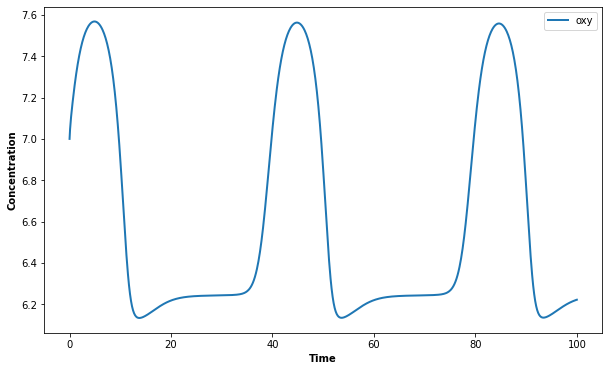

In [20]:
# Let's work with the species 'oxy'(CHEBI ID: 15379) - or dioxygen - going forward 
wolf.simulate(0, 100, 1000, ['time', 'oxy']) # note that specific species can be selected for recording concentrations over the timecourse
wolf.plot(figsize = (10, 6), xtitle = 'Time', ytitle = 'Concentration')

#  Writing SED-ML with PhraSED-ML <a class="anchor" id="writing-phrasedml"></a>

SED-ML encodes the information required by the minimal information about a simiulation experiment guidelines (MIASE) to enable reproduction of simulation experiments in a computer-readable format.

The specification includes:
* selection of experimental data for the experiment
* models used for the experiement
* which simulation to run on which models
* which results to pass to output
* how results should be output

PhraSED-ML is a language and a library that provide a text-based way to read, summarize, and create SED-ML files as part of the greater Tellurium modeling environment we have discussed.  

In [31]:
# Write phraSED-ML string specifying the simulation study
wolf_phrasedml = '''
  // Set model
  wolf = model "wolf_sbml.xml"             # model_id = model source_model

  // Deterministic simulation
  det_sim = simulate uniform(0, 500, 1000) # sim_id = simulate simulation_type
  wolf_det_sim = run det_sim on wolf       # task_id = run sim_id on model_id
  plot "Wolf et al. dynamics (Model ID: BIOMD0000000090)" time vs oxy  # plot title_name x vs y
'''

# Generate SED-ML string from the phraSED-ML string
wolf.resetAll()
wolf_sbml = wolf.getSBML()
phrasedml.setReferencedSBML("wolf_sbml.xml", wolf_sbml)
wolf_sedml = phrasedml.convertString(wolf_phrasedml)

print(wolf_sedml)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.1.1 with libSBML version 5.19.1. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3">
  <listOfModels>
    <model id="wolf" language="urn:sedml:language:sbml.level-3.version-1" source="wolf_sbml.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="det_sim" initialTime="0" outputStartTime="0" outputEndTime="500" numberOfPoints="1000">
      <algorithm kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="wolf_det_sim" modelReference="wolf" simulationReference="det_sim"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="wolf_det_sim" modelReference="wolf"/>
      </listOfVariables>
  

# Exporting SED-ML <a class="anchor" id="exporting-sedml"></a>

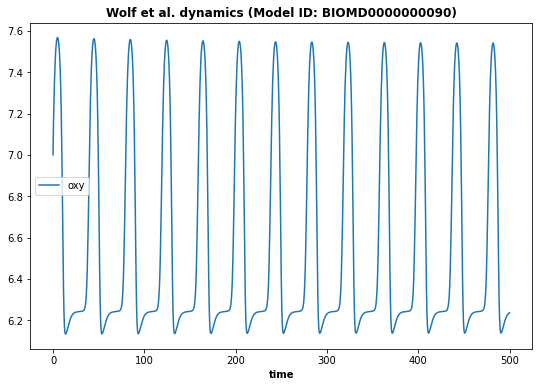

In [32]:
# Save the SED-ML simulation experiment to your current working directory
te.saveToFile('wolf_sedml.xml', wolf_sedml)

# Load and run SED-ML script
te.executeSEDML('wolf_sedml.xml')

# Generating a COMBINE archive <a class="anchor" id="combine-archive"></a>

COMBINE archives package SBML models and SED-ML simulation experiment descriptions together to ensure complete modeling studies or experiments can be exchangesd between software tools. Tellurium provides the inline Open Modeling EXchange format (OMEX) to edit contents of COMBINE archives in a human-readable format. Inline OMEX is essentially an Antimony description of the model joined to the PhraSED-ML experiment description.


In [33]:
# Read Antimony model into a string
wolf_antimony = te.readFromFile('wolf_antimony.txt')


# create an inline OMEX string
wolf_inline_omex = '\n'.join([wolf_antimony, wolf_phrasedml])
print(wolf_inline_omex)


// Created by libAntimony v2.12.0
model *wolf()

  // Compartments and Species:
  compartment c0, c1, c2;
  species $sul_ex in c0, $eth_ex in c0, $oxy_ex in c0, oxy in c2, $H2O in c2;
  species A3c in c1, aps in c1, $PPi in c1, pap in c1, sul in c1, eth in c1;
  species $A2c in c1, hyd in c1, cys in c1, N2 in c1, $N1 in c1, aco in c1;
  species oah in c1, S1 in c2, $S2 in c2, $C1 in c2, $C2 in c2, $A2m in c2;
  species A3m in c2, $Ho in c1, $Hm in c2;

  // Assignment Rules:
  A2c := Ac - A3c;
  N1 := N - N2;
  S2 := S - S1;
  A2m := Am - A3m;

  // Reactions:
  v1: $sul_ex => sul; c0*k_v0/(1 + (cys/Kc)^n);
  v13: $eth_ex => eth; c0*k_v13;
  v2: sul + A3c => aps + $PPi; c1*k2*sul*A3c;
  v10: $oxy_ex => oxy; c0*k_v10;
  v14: oxy => $oxy_ex; c2*k14*oxy;
  v3: aps + A3c => pap + $A2c; c1*k3*aps*A3c;
  v4: pap + 3 N2 => hyd + 3 $N1; c1*k4*pap*N2;
  v5: hyd + oah => cys; c1*k5*hyd*oah;
  v6: cys => ; c1*k6*cys;
  v7: eth + 2 $N1 => aco + 2 N2; c1*k7*eth*N1;
  v15: aco => oah; c1*k15*aco;
  

In [34]:
# export to a COMBINE archive
te.exportInlineOmex(wolf_inline_omex, 'wolf.omex')

# Exercises <a class="anchor" id="exercises"></a>

## Exercise 1:

Download the <a href="http://www.ebi.ac.uk/biomodels-main/BIOMD0000000010 "> Kholodenko 2000 model</a> of ultrasensitivity and negative feedback oscillations in the MAPK cascade from the BioModels Database, and upload to your workspace. Simulate and plot simulation results for the model.

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/kholodenko_publication.PNG" width="75%"></div>


In [25]:
# Write your solution here

## Exercise 1 Solution:

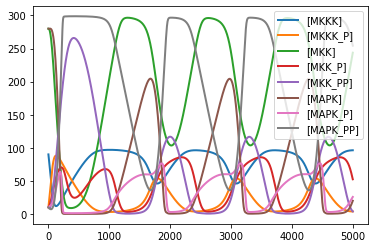

In [26]:
# Solution
r = te.loadSBMLModel(
    "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000010?filename=BIOMD0000000010_url.xml")
r.simulate(0, 5000, 1000)
r.plot()

# Acknowledgements
<br>
<div align='left'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/acknowledgments.png" width="80%"></div>

<br>
<html>
   <head>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p> B.N. Kholodenko, O.V. Demin, G. Moehren, J.B. Hoek, <cite>Quantification of short term signaling by the epidermal growth factor receptor.</cite>, J Biol Chem., vol. 274, no. 42, Oct. 1999.</p>
         </li>
      </ol>
   </body>
</html>
